# Human Action Recognition

In [1]:
import os
import numpy as np
import cv2
import time
import h5py

In [3]:
import pathlib

#import wget
import subprocess
import matplotlib.pyplot as plt

In [72]:
def download_ucf101(target_dir='../data/UCF101/'):
    print('1/2 Beginning file download...')

    compressed_dir = pathlib.Path(target_dir + '/compressed')
    compressed_dir.mkdir(parents=True, exist_ok=True)

    annotations_dir = pathlib.Path(target_dir + '/annotations')
    annotations_dir.mkdir(parents=True, exist_ok=True)
    
    destination_dir = pathlib.Path(target_dir + '/UCF-101')
    destination_dir.mkdir(parents=True, exist_ok=True)

    # download annotations for action recognition
    if pathlib.Path(compressed_dir/'UCF101TrainTestSplits-RecognitionTask.zip').exists():
        print ("File UCF101TrainTestSplits-RecognitionTask.zip exists.")
    else:    
        annotation_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip'
        filename = wget.download(annotation_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    if pathlib.Path(compressed_dir/'UCF101TrainTestSplits-DetectionTask.zip').exists():
        print ("File UCF101TrainTestSplits-DetectionTask.zip exists.")
    else:        
        # download annotations for action detection
        annotation_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-DetectionTask.zip'
        filename =wget.download(annotation_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    # download videos
    if pathlib.Path(compressed_dir/'UCF101.rar').exists():
        print ("File UCF101.rar exists.")
    else:            
        video_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'
        filename =wget.download(video_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    print('1/1 Completed.\n')



In [4]:
#download_ucf101()

In [5]:
def extract_ucf101(target_dir='../data/UCF101/'):
    print('2/2 Extracting data...')

    target_dir = pathlib.Path(target_dir)
    
    compressed_dir = pathlib.Path(target_dir/'compressed')
    compressed_dir.mkdir(parents=True, exist_ok=True)

    annotations_dir = pathlib.Path(target_dir/'annotations')
    annotations_dir.mkdir(parents=True, exist_ok=True)
    
    destination_dir = pathlib.Path(target_dir/'UCF-101')
    destination_dir.mkdir(parents=True, exist_ok=True)   

    try:
        bash_cmd = 'unrar ' + target_dir.as_posix() + '/UCF101.rar' + ' ' + target_dir.as_posix() + '/UCF-101'
        print(bash_cmd)
        process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        print(output)
    except Exception as e:
        print(e)
        
    print()
    #
    # need unrar to use it (apt-get install unrar-free)        

    bash_cmd = 'cp ' + target_dir.as_posix() + '/compressed/UCF101TrainTestSplits-RecognitionTask.zip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-RecognitionTask.zip'
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
    
    print()
    
    bash_cmd = 'unzip ' + annotations_dir .as_posix() + '/UCF101TrainTestSplits-RecognitionTask.zip -d ' + annotations_dir.as_posix()
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()    
    
    bash_cmd = 'cp ' + target_dir.as_posix() + '/compressed/UCF101TrainTestSplits-DetectionTask.zip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-DetectionTask.zip'
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
    
    bash_cmd = 'unzip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-DetectionTask.zip -d ' + annotations_dir.as_posix()
    print(bash_cmd)    
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
        
    bash_cmd = 'rm ' + target_dir.as_posix() + '/annotations/*.zip'
    print(bash_cmd)    
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
    
    print('2/2 Completed.')

In [6]:
#extract_ucf101()

In [7]:
def getUCF101(base_directory = ''):

    # action class labels
    class_file = open(base_directory + '../annotations/ucfTrainTestlist/classInd.txt','r')
    lines = class_file.readlines()
    lines = [line.split(' ')[1].strip() for line in lines]
    class_file.close()
    class_list = np.asarray(lines)

    # training data
    train_file = open(base_directory + '../annotations/ucfTrainTestlist/trainlist01.txt','r')
    lines = train_file.readlines()
    filenames = [line.split(' ')[0] for line in lines]
    y_train = [int(line.split(' ')[1].strip())-1 for line in lines]
    y_train = np.asarray(y_train)
    filenames = [base_directory + filename for filename in filenames]
    train_file.close()

    train = (np.asarray(filenames),y_train)

    # testing data
    test_file = open(base_directory + '../annotations/ucfTrainTestlist/testlist01.txt','r')
    lines = test_file.readlines()    
    filenames = [line.split(' ')[0].strip() for line in lines]
    classnames = [filename.split('/')[0] for filename in filenames]
    
    y_test = [np.where(classname == class_list)[0][0] for classname in classnames]
    y_test = np.asarray(y_test)
    filenames = [base_directory + filename for filename in filenames]
    test_file.close()

    test = (np.asarray(filenames),y_test)

    return class_list, train, test

In [23]:
def loadFrame(args, frame_index=None, use_random=True):
    mean = np.asarray([0.485, 0.456, 0.406],np.float32)
    std = np.asarray([0.229, 0.224, 0.225],np.float32)

    curr_w = 320
    curr_h = 240
    height = width = 224
    (filename,augment) = args

    data = np.zeros((3,height,width),dtype=np.float32)

    try:
        ### load file from HDF5
#         filename = filename.replace('.avi','.hdf5')
#         filename = filename.replace('UCF-101','UCF-101-hdf5')
#         h = h5py.File(filename,'r')
#         nFrames = len(h['video']) - 1
#         frame_index = np.random.randint(nFrames)
#         frame = h['video'][frame_index]

        ### load file from AVI
        cap = cv2.VideoCapture(filename)   

        if not cap.isOpened(): 
            print(f"could not open {filename}") 
            return

        nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        #frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        #frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps     = cap.get(cv2.CAP_PROP_FPS)

        if frame_index is None:
            frame_index = np.random.randint(nFrames)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        if cap.isOpened():
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES) # current frame number
            ret, frame = cap.read()  

        cap.release()
        

        if(augment==True):
            ## RANDOM CROP - crop 70-100% of original size
            ## don't maintain aspect ratio
            if use_random and np.random.randint(2)==0:
                resize_factor_w = 0.3*np.random.rand()+0.7
                resize_factor_h = 0.3*np.random.rand()+0.7
                w1 = int(curr_w*resize_factor_w)
                h1 = int(curr_h*resize_factor_h)
                w = np.random.randint(curr_w-w1)
                h = np.random.randint(curr_h-h1)
                frame = frame[h:(h+h1),w:(w+w1)]
            
            ## FLIP
            if use_random and np.random.randint(2)==0:
                frame = cv2.flip(frame,1)

            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

            ## Brightness +/- 15
            if use_random:
                brightness = 30
                random_add = np.random.randint(brightness+1) - brightness/2.0
                frame += random_add
                frame[frame>255] = 255.0
                frame[frame<0] = 0.0

        else:
            # don't augment
            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

        ## resnet model was trained on images with mean subtracted
        frame = frame/255.0
        frame = (frame - mean)/std
        frame = frame.transpose(2,0,1)
        data[:,:,:] = frame
    except:
        print("Exception: " + filename)
        data = np.array([])
    return data

In [ ]:
def loadFrame_orig(args):
    mean = np.asarray([0.485, 0.456, 0.406],np.float32)
    std = np.asarray([0.229, 0.224, 0.225],np.float32)

    curr_w = 320
    curr_h = 240
    height = width = 224
    (filename,augment) = args

    data = np.zeros((3,height,width),dtype=np.float32)

    try:
        ### load file from HDF5
#         filename = filename.replace('.avi','.hdf5')
#         filename = filename.replace('UCF-101','UCF-101-hdf5')
#         h = h5py.File(filename,'r')
#         nFrames = len(h['video']) - 1
#         frame_index = np.random.randint(nFrames)
#         frame = h['video'][frame_index]

        ### load file from AVI
        cap = cv2.VideoCapture(filename)   

        if not cap.isOpened(): 
            print(f"could not open {filename}") 
            return

        nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        #frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        #frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps     = cap.get(cv2.CAP_PROP_FPS)

        frame_index = np.random.randint(nFrames)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        if cap.isOpened():
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES) # current frame number
            ret, frame = cap.read()  

        cap.release()
        

        if(augment==True):
            ## RANDOM CROP - crop 70-100% of original size
            ## don't maintain aspect ratio
            if(np.random.randint(2)==0):
                resize_factor_w = 0.3*np.random.rand()+0.7
                resize_factor_h = 0.3*np.random.rand()+0.7
                w1 = int(curr_w*resize_factor_w)
                h1 = int(curr_h*resize_factor_h)
                w = np.random.randint(curr_w-w1)
                h = np.random.randint(curr_h-h1)
                frame = frame[h:(h+h1),w:(w+w1)]
            
            ## FLIP
            if(np.random.randint(2)==0):
                frame = cv2.flip(frame,1)

            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

            ## Brightness +/- 15
            brightness = 30
            random_add = np.random.randint(brightness+1) - brightness/2.0
            frame += random_add
            frame[frame>255] = 255.0
            frame[frame<0] = 0.0

        else:
            # don't augment
            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

        ## resnet model was trained on images with mean subtracted
        frame = frame/255.0
        frame = (frame - mean)/std
        frame = frame.transpose(2,0,1)
        data[:,:,:] = frame
    except:
        print("Exception: " + filename)
        data = np.array([])
    return data

In [28]:
def frameToImg(frame):
    # swap columns to be shown as image
    # frame = np.moveaxis(frame, 0, -1) # data = np.moveaxis(data, source, destination) 
    
    frame = frame.transpose(1, 2, 0)        
    n_frame = (frame-np.min(frame))/np.max(frame-np.min(frame))    
    return n_frame

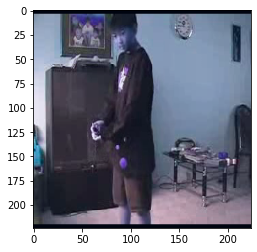

In [32]:
%matplotlib inline

filename = '../data/UCF101/UCF-101/YoYo/v_YoYo_g25_c05.avi'
augment = True
frame = loadFrame((filename, augment), frame_index=15, use_random=False)

plt.imshow(frameToImg(frame))


In [33]:
import numpy as np
import os
import sys
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.distributed as dist
import torchvision

# from helperFunctions import getUCF101
# from helperFunctions import loadFrame

import h5py
import cv2

from multiprocessing import Pool

IMAGE_SIZE = 224
NUM_CLASSES = 101
batch_size = 100
lr = 0.0001
num_of_epochs = 10


data_directory = '../data/UCF101/UCF-101/'
class_list, train, test = getUCF101(base_directory = data_directory)

In [34]:
model =  torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048,NUM_CLASSES)

for param in model.parameters():
    param.requires_grad_(False)

# for param in model.conv1.parameters():
#     param.requires_grad_(True)
# for param in model.bn1.parameters():
#     param.requires_grad_(True)
# for param in model.layer1.parameters():
#     param.requires_grad_(True)
# for param in model.layer2.parameters():
#     param.requires_grad_(True)
# for param in model.layer3.parameters():
#     param.requires_grad_(True)
for param in model.layer4[2].parameters():
    param.requires_grad_(True)
for param in model.fc.parameters():
    param.requires_grad_(True)

params = []
# for param in model.conv1.parameters():
#     params.append(param)
# for param in model.bn1.parameters():
#     params.append(param)
# for param in model.layer1.parameters():
#     params.append(param)
# for param in model.layer2.parameters():
#     params.append(param)
# for param in model.layer3.parameters():
#     params.append(param)
for param in model.layer4[2].parameters():
    params.append(param)
for param in model.fc.parameters():
    params.append(param)

#model.cuda()

optimizer = optim.Adam(params,lr=lr)
criterion = nn.CrossEntropyLoss()

In [35]:
pool_threads = Pool(8,maxtasksperchild=200)

In [36]:
for epoch in range(0,num_of_epochs):

    ###### TRAIN
    train_accu = []
    model.train()
    random_indices = np.random.permutation(len(train[0]))
    start_time = time.time()
    for i in range(0, len(train[0])-batch_size,batch_size):

        augment = True
        video_list = [(train[0][k],augment)
                       for k in random_indices[i:(batch_size+i)]]
        data = pool_threads.map(loadFrame,video_list)

        next_batch = 0
        for video in data:
            if video.size==0: # there was an exception, skip this
                next_batch = 1
        if(next_batch==1):
            continue

        x = np.asarray(data,dtype=np.float32)
        x = Variable(torch.FloatTensor(x))# .cuda().contiguous()

        y = train[1][random_indices[i:(batch_size+i)]]
        y = torch.from_numpy(y) #.cuda()

        output = model(x)

        loss = criterion(output, y)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        
        prediction = output.data.max(1)[1]
        accuracy = ( float( prediction.eq(y.data).sum() ) /float(batch_size))*100.0
        if(epoch==0):
            print(i,accuracy)
        train_accu.append(accuracy)
    accuracy_epoch = np.mean(train_accu)
    print(epoch, accuracy_epoch,time.time()-start_time)

torch.save(model,'single_frame.model')
pool_threads.close()
pool_threads.terminate()

0 1.0
100 2.0
200 0.0
300 3.0
400 1.0
500 4.0
600 6.0
700 7.000000000000001
800 6.0
900 4.0
1000 8.0
1100 5.0
1200 13.0
1300 7.000000000000001
1400 17.0
1500 18.0
1600 17.0
1700 20.0
1800 14.000000000000002
1900 18.0
2000 20.0
2100 22.0
2200 27.0
2300 25.0
2400 20.0
2500 23.0
2600 28.000000000000004
2700 24.0
2800 37.0
2900 26.0
3000 24.0
3100 30.0
3200 28.000000000000004
3300 25.0
3400 28.000000000000004
3500 22.0
3600 30.0
3700 25.0
3800 27.0
3900 27.0
4000 37.0
4100 40.0
4200 27.0
4300 28.999999999999996
4400 30.0
4500 38.0
4600 35.0
4700 40.0
4800 37.0
4900 39.0
5000 39.0
5100 34.0
5200 44.0
5300 40.0
5400 33.0
5500 51.0
5600 40.0
5700 40.0
5800 42.0
5900 35.0
6000 48.0
6100 43.0
6200 40.0
6300 48.0
6400 47.0
6500 43.0
6600 34.0
6700 35.0
6800 48.0
6900 51.0
7000 43.0
7100 53.0
7200 36.0
7300 37.0
7400 46.0
Exception: ../data/UCF101/UCF-101/Basketball/v_Basketball_g18_c05.avi
7600 51.0
7700 46.0
7800 44.0
7900 49.0
8000 52.0
8100 53.0
8200 54.0
8300 54.0
8400 57.99999999999999
8500